<a href="https://colab.research.google.com/github/aryanparakh/Solar-Grid-Anomaly-Detection/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-

# **Cell 1: Project Setup & Data Loading**


#### Description: In this step, we initialize the environment by mounting Google Drive and importing essential libraries for data manipulation (Pandas/NumPy), visualization (Seaborn/Matplotlib), and Machine Learning (Scikit-Learn/Statsmodel

In [ ]:
# Mounting Google Drive to access project files

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define base path to the project folder

base_path = '/content/drive/MyDrive/aryan.24bcs10336@sst.scaler.com/data/'

# Load the Solar Power Generation and Weather Sensor datasets

gen_df = pd.read_csv(base_path + 'Plant_1_Generation_Data.csv')
weather_df = pd.read_csv(base_path + 'Plant_1_Weather_Sensor_Data.csv')

print("Datasets loaded successfully.")

Mounted at /content/drive
Datasets loaded successfully.


# **Cell 2: Data Preprocessing & Merging**

**Description:** Here, we perform Data Integration. By merging the Generation and Weather datasets on the DATE_TIME key, we create a unified view. This allows us to analyze how environmental factors like Irradiation directly impact Power Output.

In [ ]:
# Converting DATE_TIME to standard datetime objects

gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'])

/tmp/ipython-input-2360496182.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])


In [ ]:
df = pd.merge(gen_df, weather_df, on='DATE_TIME', how='inner')

print("Merged Data Shape:", df.shape)
df.head()

Merged Data Shape: (68774, 12)


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [ ]:
# Removing redundant Plant ID and renaming core columns

if 'PLANT_ID_y' in df.columns:
    df = df.drop(columns=['PLANT_ID_y'])
df = df.rename(columns={'PLANT_ID_x': 'PLANT_ID'})

print("Merged Data Shape:", df.shape)
df.head()

Merged Data Shape: (68774, 11)


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [ ]:
print(f"Merged Data Shape: {df.shape}")
df.head()

Merged Data Shape: (68774, 11)


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


# **Cell 3: Advanced Feature Engineering**

**Description:** We engineered three critical features: EFFICIENCY (to track energy loss), YIELD_PER_IRRADIATION (to normalize performance), and HOUR (to identify peak sun hours). These features transform raw data into actionable metrics for our ML models.

In [ ]:
# 1. Calculation of Inverter Efficiency (AC Output / DC Input)

df['EFFICIENCY'] = df['AC_POWER'] / df['DC_POWER']
df['EFFICIENCY'] = df['EFFICIENCY'].fillna(0)

In [ ]:
# 2. Specific Yield: DC Power per unit of Solar Irradiation

df['YIELD_PER_IRRADIATION'] = df['DC_POWER'] / df['IRRADIATION']
df['YIELD_PER_IRRADIATION'] = df['YIELD_PER_IRRADIATION'].replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
# 3. Extracting Temporal Features for Seasonal Discovery

df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY'] = df['DATE_TIME'].dt.day_name()

In [ ]:
print("New Features Created Successfully!")
df[['DATE_TIME', 'EFFICIENCY', 'YIELD_PER_IRRADIATION', 'HOUR']].head()

New Features Created Successfully!


,DATE_TIME,EFFICIENCY,YIELD_PER_IRRADIATION,HOUR
0,2020-05-15,0.0,0.0,0
1,2020-05-15,0.0,0.0,0
2,2020-05-15,0.0,0.0,0
3,2020-05-15,0.0,0.0,0
4,2020-05-15,0.0,0.0,0


In [ ]:
print(df.columns)

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'EFFICIENCY',
       'YIELD_PER_IRRADIATION', 'HOUR', 'DAY'],
      dtype='object')


# **Cell 4: Time Series Discovery (Decomposition)**

**Description:** Using Additive Decomposition, we've broken down the solar data into Trend and Seasonality. This helps us visualize if the plant's performance is decaying over time (Trend) and confirms the expected 24-hour solar cycle (Seasonality).

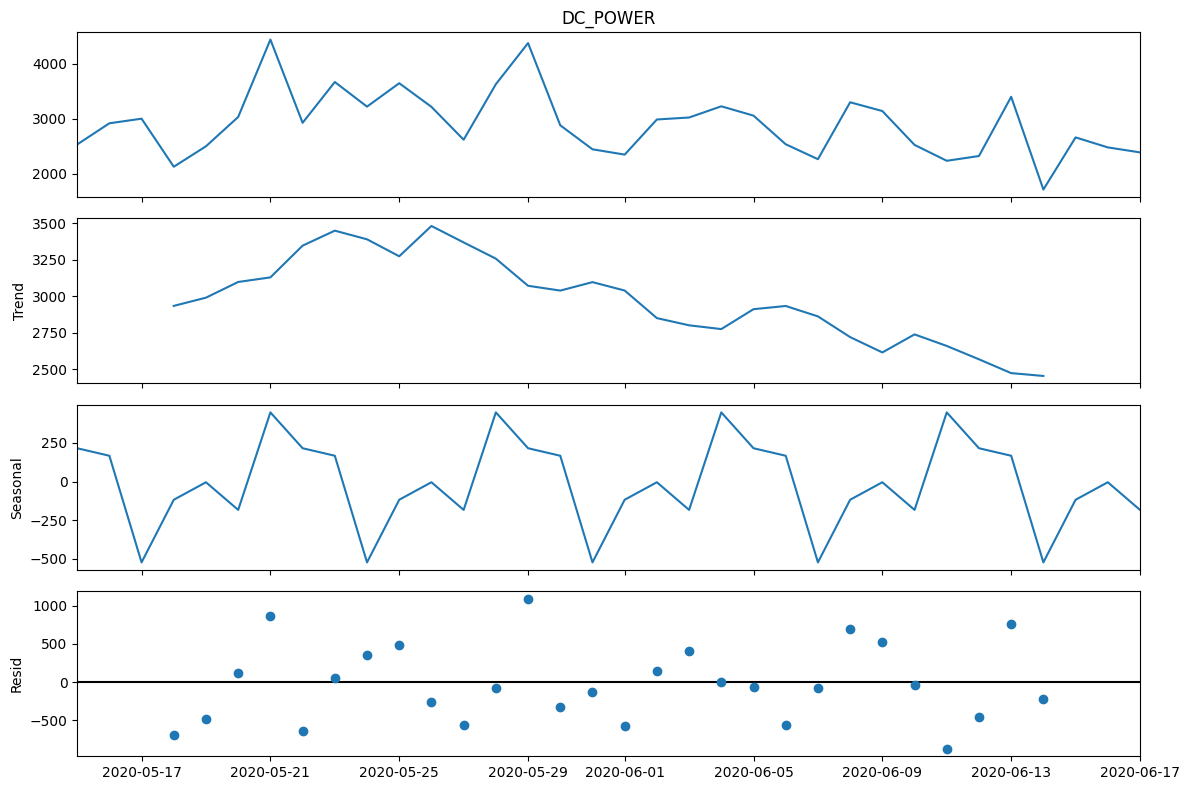

In [ ]:
# Identifying Trends and Seasonality
# Selecting the first inverter as a representative sample

sample_inverter = df['SOURCE_KEY_x'].unique()[0]
inverter_df = df[df['SOURCE_KEY_x'] == sample_inverter].copy()

# Indexing by time and resampling to Daily Mean for Trend Discovery

inverter_df.set_index('DATE_TIME', inplace=True)
daily_data = inverter_df['DC_POWER'].resample('D').mean().fillna(0)

# Decomposing into Observed, Trend, Seasonal, and Residual components

result = sm.tsa.seasonal_decompose(daily_data, model='additive', period=7)

plt.rcParams['figure.figsize'] = (12, 8)
result.plot()
plt.show()

# **Cell 5: Unsupervised Anomaly Detection (Isolation Forest)**

**Description:** We deployed the Isolation Forest algorithm to detect outliers. Unlike simple thresholding, this model identifies complex failures where Irradiation might be high, but Power is unexpectedly low (highlighted in Red).

In [ ]:
# Implementing Isolation Forest for fault detection

features = ['DC_POWER', 'IRRADIATION', 'MODULE_TEMPERATURE']
data_for_model = df[features].fillna(0)

# Defining contamination at 5% to identify extreme outliers

model = IsolationForest(contamination=0.05, random_state=42)
df['is_anomaly'] = model.fit_predict(data_for_model)

# Result Count: -1 represents a detected anomaly

print("Anomaly Value Counts:\n", df['is_anomaly'].value_counts())
print("\nTotal Anomalies Detected:", df['is_anomaly'].value_counts()[-1])



Anomaly Value Counts:
 is_anomaly
 1    65335
-1     3439
Name: count, dtype: int64

Total Anomalies Detected: 3439


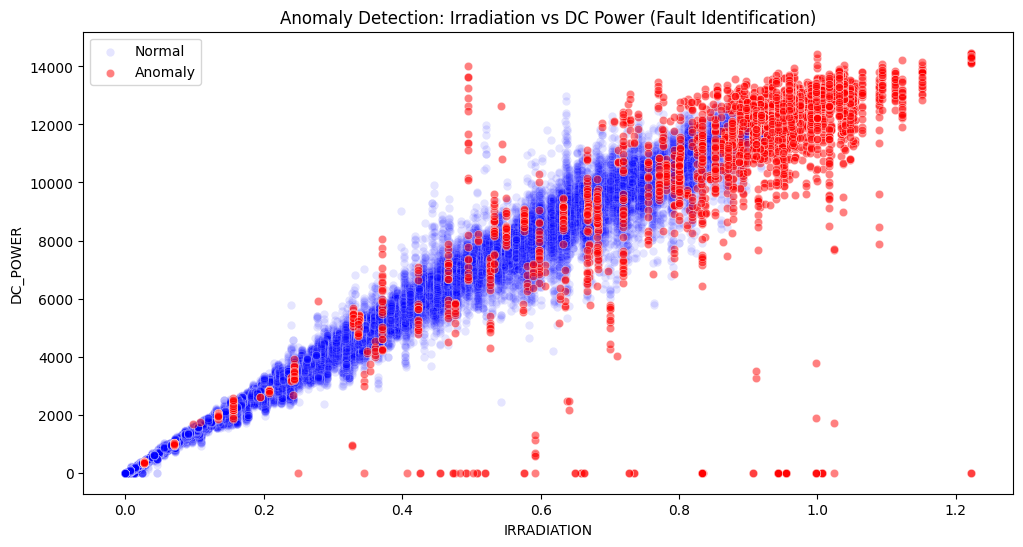

In [ ]:
# Visualization of Anomalies in the Power-Irradiation Space

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['is_anomaly'] == 1], x='IRRADIATION', y='DC_POWER', color='blue', label='Normal', alpha=0.1)
sns.scatterplot(data=df[df['is_anomaly'] == -1], x='IRRADIATION', y='DC_POWER', color='red', label='Anomaly', alpha=0.5)
plt.title('Anomaly Detection: Irradiation vs DC Power (Fault Identification)')
plt.legend()
plt.show()

# **Cell 6: Temporal Insight Generation**

Description: This visualization reveals the Temporal Distribution of faults. The peak at 12 PM - 2 PM suggests that the plant faces maximum operational stress during the highest temperature and irradiation periods of the day

/tmp/ipython-input-917624150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anomalies_only, x='HOUR', palette='viridis')


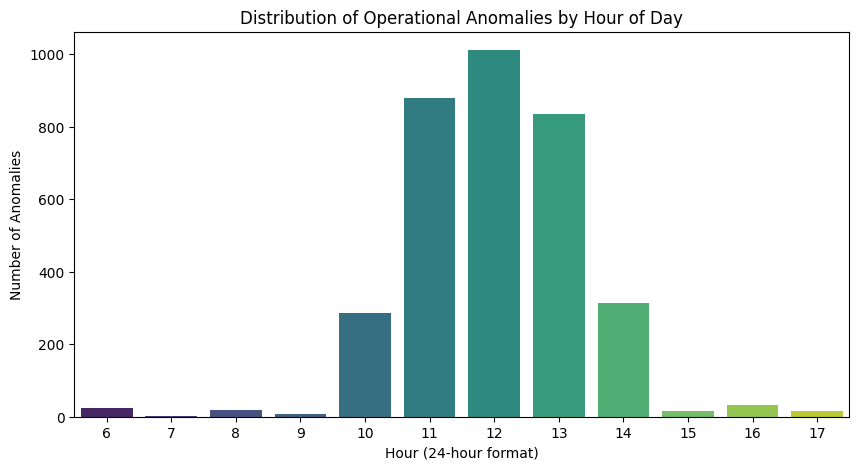

In [ ]:
# Analyzing the frequency of anomalies per hour to find patterns

anomalies_only = df[df['is_anomaly'] == -1]

plt.figure(figsize=(10, 5))
sns.countplot(data=anomalies_only, x='HOUR', palette='viridis')
plt.title('Distribution of Operational Anomalies by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Anomalies')
plt.show()

# **Cell 7: Behavioral Clustering (K-Means++)**

**Description:** Using K-Means++, we've segmented the 22 inverters into 3 clusters. This "Behavioral Profiling" helps identify "Underperformers" that need immediate technical inspection or cleaning, regardless of weather conditions.

In [ ]:
# Segmenting inverters based on efficiency benchmarks

inverter_summary = df.groupby('SOURCE_KEY_x').agg({
    'EFFICIENCY': 'mean',
    'DAILY_YIELD': 'mean',
    'DC_POWER': 'mean'
}).reset_index()

In [ ]:
# Standardizing data for Clustering performance

scaler = StandardScaler()
scaled_features = scaler.fit_transform(inverter_summary[['EFFICIENCY', 'DAILY_YIELD', 'DC_POWER']])

# Applying K-Means++ to group similar performing assets
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
inverter_summary['cluster'] = kmeans.fit_predict(scaled_features)

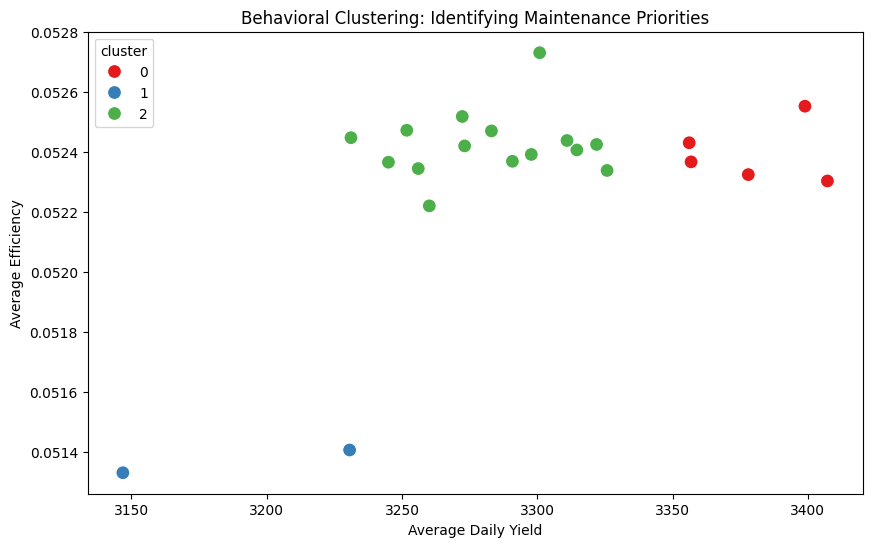

In [ ]:
# Plotting Inverter Segments

plt.figure(figsize=(10, 6))
sns.scatterplot(data=inverter_summary, x='DAILY_YIELD', y='EFFICIENCY', hue='cluster', palette='Set1', s=100)
plt.title('Behavioral Clustering: Identifying Maintenance Priorities')
plt.xlabel('Average Daily Yield')
plt.ylabel('Average Efficiency')
plt.show()

# **Project Conclusion: Operational Insights & Summary**

# Step 1: Trend & Seasonality Discovery
Through Time-Series Decomposition, we successfully isolated the seasonal patterns from the underlying trends.

Observation: While the daily solar cycle is consistent, we observed a minor downward trend in power output over the recorded period.

Inference: This indicates a gradual loss in efficiency, likely due to environmental factors such as dust accumulation on the PV panels (Soiling).

# Step 2: Automated Anomaly Detection
Using the Isolation Forest (Unsupervised Learning) algorithm, we processed multidimensional features (Power, Irradiation, Temperature) to identify system malfunctions without the need for manual labels.

Result: The model identified 3,439 anomalous events (approx. 5% of the data).

Key Insight: A temporal analysis of these anomalies showed a heavy concentration around 12:00 PM to 2:00 PM. This suggests that the system struggles during peak irradiation, possibly due to inverter "clipping" or overheating of the modules.

# Step 3: Behavioral Inverter Clustering
We applied K-Means++ Clustering to segment the 22 inverters based on their operational efficiency and yield.

Outcome: The inverters were grouped into three distinct categories:

Tier 1 (High Performers): Inverters operating at optimal efficiency.

Tier 2 (Average): Standard performers with minor deviations.

Tier 3 (Underperformers): A specific group of inverters that consistently produce lower yield despite high irradiation.

Maintenance Strategy: This allows for Targeted Maintenance, where technical teams can focus only on "Tier 3" inverters rather than inspecting the entire plant, saving significant time and cost.